<a href="https://colab.research.google.com/github/lail-lei/AML/blob/main/project3/lailei_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Pandas and Create DataFrames**

In [926]:
# Pandas is mainly used for data analysis. Pandas allows importing data from various file formats 
# such as comma-separated values, JSON, SQL, Microsoft Excel. 
# Pandas allows various data manipulation operations such as merging, reshaping, selecting, 
# as well as data cleaning, and data wrangling features.
import pandas as pd

# NumPy has support for large, multi-dimensional arrays and matrices, along with 
# a large collection of high-level mathematical functions to operate on these arrays.
import numpy as np

# Import matplotlib 
import matplotlib.pyplot as plt 
# Import seaborn for graphing 
import seaborn as sbn

# Read raw file from github into a dataframe 
df = pd.read_csv('https://raw.githubusercontent.com/lail-lei/AML/main/project3/heart.csv')

## **Target Classes**

In [927]:
# separate data frame into target classes 

# heart disease is present
positive = pd.DataFrame(df.loc[df['target'] == 1])

# heart disease is absent
negative = pd.DataFrame(df.loc[df['target'] == 0])

## **Separating Target from Features**

In [928]:
# all columns but the target class
X = df.drop(['target'],axis=1)

# target column
y = df['target']

## **Grouped Data**

In [929]:
# let's group continous column values into ranges so can be visualized better 
groupedX = X.copy(deep=True)

# break each column down by quartile
def create_conditions (column):
    return [ groupedX[column] <= groupedX[column].quantile(.25), 
             groupedX[column] <= groupedX[column].quantile(.5), 
             groupedX[column] <= groupedX[column].quantile(.75),
             groupedX[column] <= groupedX[column].quantile(1.0)
            ]

# labels to correspond with quartiles
choices = [0, 1, 2, 3]

# create conditions and replace values with new labels

# for age
age_conditions = create_conditions("age")
groupedX["age"] = pd.DataFrame(np.select(age_conditions, choices, default=0))

# for cholesterol
chol_conditions = create_conditions("chol")
groupedX["chol"] = pd.DataFrame(np.select(chol_conditions, choices, default=0))

# for thalach
thalach_conditions = create_conditions("thalach")
groupedX["thalach"] = pd.DataFrame(np.select(thalach_conditions, choices, default=0))

# for resting blood pressure
tres_conditions = create_conditions("trestbps")
groupedX["trestbps"] = pd.DataFrame(np.select(tres_conditions, choices, default=0))

# for old peak 
oldpeak_conditions = create_conditions("oldpeak")
groupedX["oldpeak"] = pd.DataFrame(np.select(oldpeak_conditions, choices, default=0))


## **Scaled Data**

In [930]:
# import our pipeline 
from sklearn.pipeline import Pipeline
# import our standard scaler 
from sklearn.preprocessing import StandardScaler

# create pipeline
# would use imputer here, but already did it a few steps above
num_pipeline = Pipeline([("std_scaler", StandardScaler())])

# get numpy array of scaled data (s)
standard_scaled = num_pipeline.fit_transform(X)
# turn to data frame
standard_scaled = pd.DataFrame(standard_scaled, columns=X.columns, index=X.index);

# describe standard scale
standard_scaled.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,5.825923e-17,-1.319077e-17,-5.562565e-17,-7.146832e-16,-9.828955e-17,-3.664102e-19,2.652810e-16,-5.203025e-16,-5.203025e-16,-3.140136e-16,1.355718e-16,4.752341e-16,3.484561e-16
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-1.468418e+00,-9.385146e-01,-2.148802e+00,-2.324160e+00,-4.176345e-01,-1.005832e+00,-3.439267e+00,-6.966305e-01,-8.968617e-01,-2.274579e+00,-7.144289e-01,-3.784824e+00
25%,-7.572802e-01,-1.468418e+00,-9.385146e-01,-6.638668e-01,-6.814943e-01,-4.176345e-01,-1.005832e+00,-7.061105e-01,-6.966305e-01,-8.968617e-01,-6.491132e-01,-7.144289e-01,-5.129219e-01
50%,6.988599e-02,6.810052e-01,3.203122e-02,-9.273778e-02,-1.210553e-01,-4.176345e-01,8.989622e-01,1.466343e-01,-6.966305e-01,-2.067053e-01,-6.491132e-01,-7.144289e-01,-5.129219e-01
75%,7.316189e-01,6.810052e-01,1.002577e+00,4.783913e-01,5.456738e-01,-4.176345e-01,8.989622e-01,7.151309e-01,1.435481e+00,4.834512e-01,9.763521e-01,2.650822e-01,1.123029e+00
max,2.496240e+00,6.810052e-01,1.973123e+00,3.905165e+00,6.140401e+00,2.394438e+00,2.803756e+00,2.289429e+00,1.435481e+00,4.451851e+00,9.763521e-01,3.203615e+00,1.123029e+00


### **Min Max Scaler**

In [931]:
# import our pipeline 
from sklearn.pipeline import Pipeline
# import our standard scaler 
from sklearn.preprocessing import MinMaxScaler

# create pipeline
# would use imputer here, but already did it a few steps above
num_pipeline = Pipeline([("min_max_scaler", MinMaxScaler())])

# get numpy array of scaled data (s)
mm_scaled = num_pipeline.fit_transform(X)
# turn to data frame
mm_scaled = pd.DataFrame(mm_scaled, columns=X.columns, index=X.index);

# describe standard scale
mm_scaled.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.683168,0.322332,0.354941,0.274575,0.148515,0.264026,0.600358,0.326733,0.167678,0.699670,0.182343,0.771177
std,0.189210,0.466011,0.344017,0.165454,0.118335,0.356198,0.262930,0.174849,0.469794,0.187270,0.308113,0.255652,0.204092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.477099,0.000000,0.000000,0.500000,0.000000,0.666667
50%,0.541667,1.000000,0.333333,0.339623,0.260274,0.000000,0.500000,0.625954,0.000000,0.129032,0.500000,0.000000,0.666667
75%,0.666667,1.000000,0.666667,0.433962,0.339041,0.000000,0.500000,0.725191,1.000000,0.258065,1.000000,0.250000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Distribution Visualization**

## **Visualizing Distributions for the Positive Class**

In [932]:
# 165 positive patients
positive.shape

(165, 14)

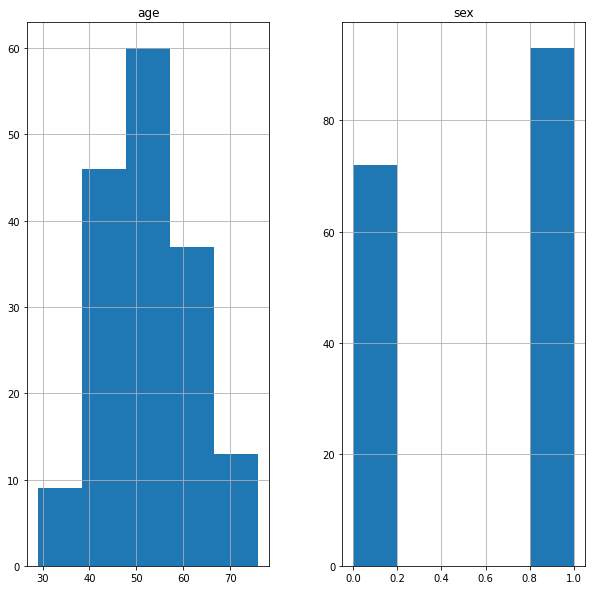

In [933]:
# Plot distribution of age and sex of positive 
%matplotlib inline
positive.hist(["age", "sex"], bins=5, figsize=(10,10))
plt.show()

In [934]:
positive.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


Positive patients ages fall on a relatively normal distribution between 29 and 76. The distribution is slightly skewed to the left.

More than half of positive patients are male.

## **Visualizing Distributions for the Negative Class**

In [935]:
# 138 negative patients
negative.shape

(138, 14)

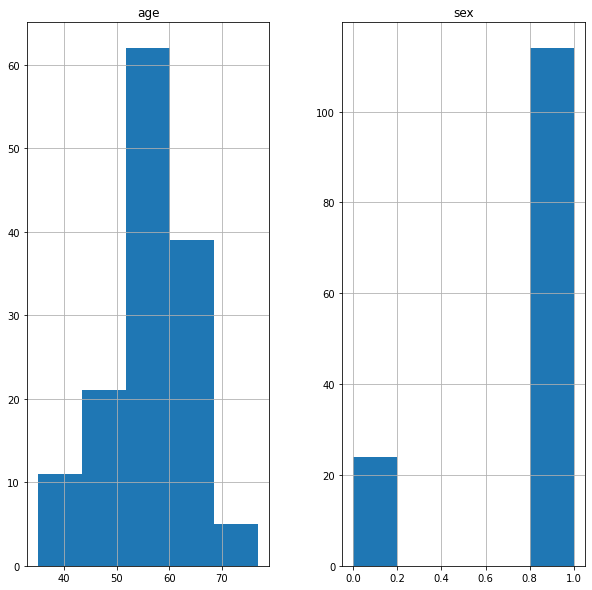

In [936]:
# Plot distribution of age and sex of positive 
%matplotlib inline
negative.hist(["age", "sex"], bins=5, figsize=(10,10))
plt.show()

In [937]:
negative.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


Negative patients ages fall on a relatively normal distribution between 35 and 77. The distribution is slightly skewed to the right.

There appears to be around 5 times as many male negative patients as female. 

# **Feature Correlations**

##**Correlation heatmap**

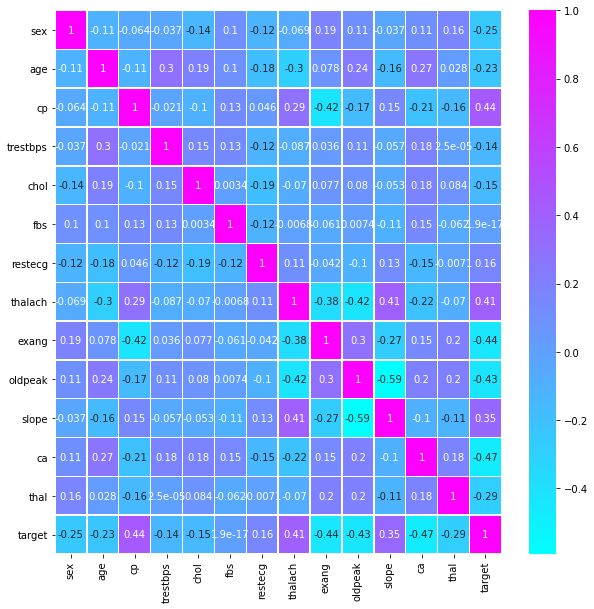

In [938]:

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# use the 80-20 rule for validation.
# let's used the grouped data 
X_train, X_test, y_train, y_test = train_test_split(groupedX, y, stratify=y, test_size=0.2)

# produce a heatmap of feature correlations
X_comb = pd.concat([X_train, y_train.astype(float)], axis=1)
fig, ax = plt.subplots(figsize=(10,10))
g = sbn.heatmap(X_comb[['sex', 'age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',	'exang',	'oldpeak',	'slope',	'ca',	'thal', 'target' ]].corr(),
                annot=True, 
                ax=ax,
                linewidths=.5,
                cmap = "cool")



The target class (diagnosis) has the highest positive correlation with the classes cp (chest pain), thalach (maximum heart rate achieved), slope (the slope of the peak exercise ST segment).

The target class has the highest negative correlation with exercise induced angina, ca (number of major vessels (0-3) colored by flourosopy), and oldpeak (ST depression induced by exercise relative to rest). 

##**Cross tabulation**

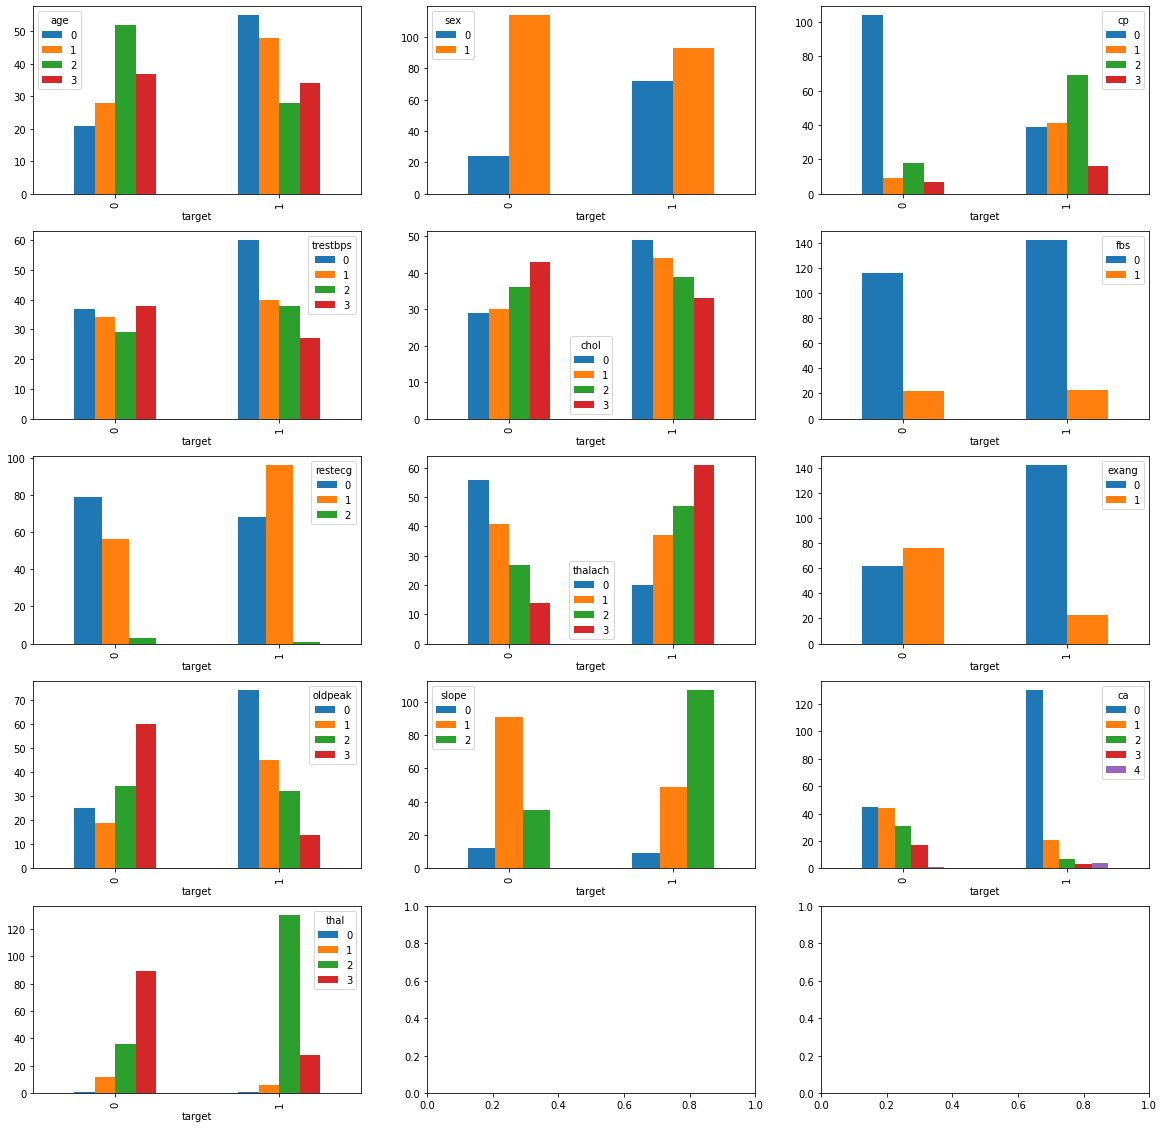

In [939]:
# let's cross tabulate and compute impact of sex, age, and chest pain (cp), on 
# the target variable
figure, axes = plt.subplots(5, 3, figsize=(20, 20))

# function to help display subplots 

classIndex = 0;

for row in range(5):
  for col in range(3):
    if classIndex == 13: 
      break
    ct1 = pd.crosstab(y[:], groupedX[groupedX.columns[classIndex]])
    ct1.plot.bar(ax = axes[row][col])
    classIndex += 1
    

plt.show()


Chest pain has a strong correlation to the diagnosis, and the cross tabulated graph demonstrates that. The clear majority of negative patients had pain rated at the 25th percentile or less.

The correlation between diagnosis and thalach is nicely represented in it's cross tabulated graph. The thalach increases with each quartile in the positive population.  

The ca value (number of major vessels (0-3) colored by flourosopy) has a strong inverse relationship to diagnosis. The cross tabulated graph also demonstrates this. Among positive patients, a clear majority had a number of major vessels at or below the 25th percentile. 

The negative correlations between diagnosis and exercise induced angina and diagnosis and oldspeak are also clearly demonstrated by their respective cross tabulated graphs. 

In [940]:
# Create the correlation matrix from entire dataframe
corr_matrix= df.corr()

# Create the correlation matrix from our prepared data 
corr_matrix["target"].sort_values(ascending=False)


target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

# **Check for Missing Values**

In [941]:
# Show how many null values per column 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There appears to be no missing values.

# **Logistic Regression**

## **Using grouped data**

### **Running the model**

In [942]:
# use the 80-20 rule for validation.

# First, let's used the grouped data
X_train, X_test, y_train, y_test = train_test_split(groupedX, y, stratify=y, test_size=0.2,  random_state = 54)

In [943]:
# 242 training cases 
X_train.shape

(242, 13)

In [944]:
# 61 training cases 
X_test.shape

(61, 13)

In [945]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l1', #lasso regression
                        solver='saga',
                        max_iter=1000,
                        C=50,
                        verbose=2, # output progress
                        n_jobs=5, # parallelize over 5 processes
                        tol=0.01
                        )


# Fit the model 
# let's try first with the 
lr_classifier.fit(X_train, y_train)

# Let's see what the classifier has learned
lr_classifier.classes_

convergence after 19 epochs took 0 seconds


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.0s finished


array([0, 1])

### **The confusion matrix and classification report**

In [946]:
# The confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

lr_predictions = lr_classifier.predict(X_test)

labels = lr_classifier.classes_

# compute TP, TN, FP, FN values
lr_cm = confusion_matrix(y_true=y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)
# print confusion matrix
pd.DataFrame(lr_cm, index=labels, columns=labels)

,0,1
0,25,3
1,2,31


In [947]:
# Accuracy scores on the training and testing sets

lr_train_grouped = round(lr_classifier.score(X_train, y_train), 2) # training score
lr_test_grouped = round(lr_classifier.score(X_test, y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (lr_train_grouped, lr_test_grouped))

Training and Testing scores: 0.86, 0.92


In [948]:
# compute recall, precision, f1-scores
lr_cr = classification_report(y_true=y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)

print(lr_cr)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        28
           1       0.91      0.94      0.93        33

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



### **The ROC curve**

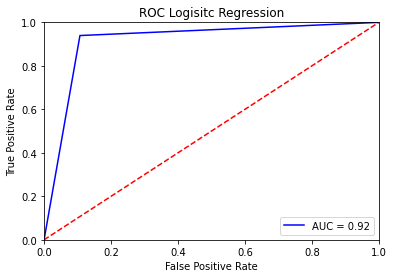

In [949]:
from sklearn.metrics import roc_curve, roc_auc_score

# calculate receiver operating characteristic(ROC) curve 

# calculate false positive rate (1 - specificity)
# calculate true positive rate (recall/sensitivity)
fpr, tpr, threshold = roc_curve(y_test, lr_predictions)

# calculate the area under the curve score (correctly classified instances)
roc_auc = roc_auc_score(y_test, lr_predictions)

# plot roc_auc score
import matplotlib.pyplot as plt
plt.title('ROC Logisitc Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### **Summary**

Using the grouped data, my logistic regression model performed very well. 

The model had an overalll testing set accuracy score of 92%. It's precision was 91%, and it's recall was 94%. The f1 score was 0.93. It was least successful at predicting what was "not" a positive diagnosis- it's specificity is ~89%.

As demonstrated by the ROC curve graph, the AUC was 0.92, which suggests when data is grouped, the logistic regression model performed very well on it's testing set.

Out of curiousity, does logistic regression perform as well when the data is not grouped?



## **Using ungrouped data**

### **Running the model**

In [950]:
# use the 80-20 rule for validation.

# now let's used the ungrouped data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,  random_state = 54)


In [951]:
# 242 training cases 
X_train.shape

(242, 13)

In [952]:
# 61 training cases 
X_test.shape

(61, 13)

In [953]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l1', #lasso regression
                        solver='saga',
                        max_iter=1000,
                        C=50,
                        verbose=2, # output progress
                        n_jobs=5, # parallelize over 5 processes
                        tol=0.01
                        )


# Fit the model 
# let's try first with the 
lr_classifier.fit(X_train, y_train)

# Let's see what the classifier has learned
lr_classifier.classes_

convergence after 84 epochs took 0 seconds


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.0s finished


array([0, 1])

### **The confusion matrix and classification report**

In [954]:
# The confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

lr_predictions = lr_classifier.predict(X_test)

labels = lr_classifier.classes_

# compute TP, TN, FP, FN values
lr_cm = confusion_matrix(y_true=y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)
# print confusion matrix
pd.DataFrame(lr_cm, index=labels, columns=labels)

,0,1
0,19,9
1,8,25


In [955]:
# Accuracy scores on the training and testing sets

lr_train = round(lr_classifier.score(X_train, y_train), 2) # training score
lr_test = round(lr_classifier.score(X_test, y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (lr_train, lr_test))

Training and Testing scores: 0.71, 0.72


In [956]:
# compute recall, precision, f1-scores
lr_cr = classification_report(y_true=y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)

print(lr_cr)

              precision    recall  f1-score   support

           0       0.70      0.68      0.69        28
           1       0.74      0.76      0.75        33

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



### **The ROC curve**

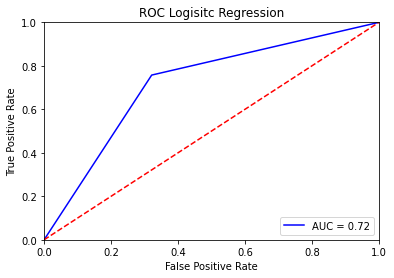

In [957]:
from sklearn.metrics import roc_curve, roc_auc_score

# calculate receiver operating characteristic(ROC) curve 

# calculate false positive rate (1 - specificity)
# calculate true positive rate (recall/sensitivity)
fpr, tpr, threshold = roc_curve(y_test, lr_predictions)

# calculate the area under the curve score (correctly classified instances)
roc_auc = roc_auc_score(y_test, lr_predictions)

# plot roc_auc score
import matplotlib.pyplot as plt
plt.title('ROC Logisitc Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### **Summary**

Logistic Regression performed significantly better on the grouped dataset. 

On the ungrouped testing set, the model had an overalll  accuracy score of 72% (20% lower). It's precision was 74%, and it's recall was 76%. The f1 score was 0.75. It was again least successful at predicting what was "not" a positive diagnosis- it's specificity is ~69%.

As demonstrated by the ROC curve graph, the AUC was 0.72. Logisitic regression performs around 20% better when the dimensionality of the dataset is reduced to "categories" rather than continous values.





## **Using standard scaled (ungrouped) data**

### **Running the model**

In [958]:
# use the 80-20 rule for validation.

# now let's used the ungrouped, scaled data
X_train, X_test, y_train, y_test = train_test_split(standard_scaled, y, stratify=y, test_size=0.2,  random_state = 54)


In [959]:
# 242 training cases 
X_train.shape

(242, 13)

In [960]:
# 61 training cases 
X_test.shape

(61, 13)

In [961]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l1', #lasso regression
                        solver='saga',
                        max_iter=1000,
                        C=50,
                        verbose=2, # output progress
                        n_jobs=5, # parallelize over 5 processes
                        tol=0.01
                        )


# Fit the model 
# let's try first with the 
lr_classifier.fit(X_train, y_train)

# Let's see what the classifier has learned
lr_classifier.classes_

convergence after 10 epochs took 0 seconds


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.0s finished


array([0, 1])

### **The confusion matrix and classification report**

In [962]:
# The confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

lr_predictions = lr_classifier.predict(X_test)

labels = lr_classifier.classes_

# compute TP, TN, FP, FN values
lr_cm = confusion_matrix(y_true=y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)
# print confusion matrix
pd.DataFrame(lr_cm, index=labels, columns=labels)

,0,1
0,24,4
1,3,30


In [963]:
# Accuracy scores on the training and testing sets

lr_train_scaled = round(lr_classifier.score(X_train, y_train), 2) # training score
lr_test_scaled = round(lr_classifier.score(X_test, y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (lr_train_scaled, lr_test_scaled))

Training and Testing scores: 0.86, 0.89


In [964]:
# compute recall, precision, f1-scores
lr_cr = classification_report(y_true=y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)

print(lr_cr)

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.88      0.91      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### **The ROC curve**

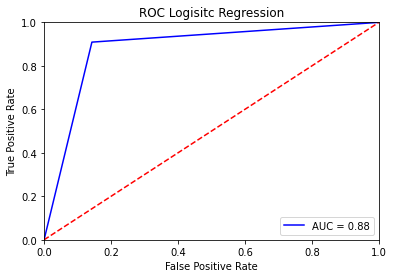

In [965]:
from sklearn.metrics import roc_curve, roc_auc_score

# calculate receiver operating characteristic(ROC) curve 

# calculate false positive rate (1 - specificity)
# calculate true positive rate (recall/sensitivity)
fpr, tpr, threshold = roc_curve(y_test, lr_predictions)

# calculate the area under the curve score (correctly classified instances)
roc_auc = roc_auc_score(y_test, lr_predictions)

# plot roc_auc score
import matplotlib.pyplot as plt
plt.title('ROC Logisitc Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### **Summary**

Logistic Regression performed significantly better on the scaled ungrouped dataset than the unscaled, ungrouped data set.

On the scaled testing set, the model had an overalll  accuracy score of 89%. It's precision was 88%, and it's recall was 91%. The f1 score was 0.90. It was about as  successful at predicting what was "not" a positive diagnosis- it's specificity is ~86%.

As demonstrated by the ROC curve graph, the AUC was 0.88. 

Logisitic regression performs best when the dimensionality of the dataset is reduced to "categories" rather than continous values. But, if the original dataset is scaled, regression performs nearly as well as it does on the reduced dimensionality dataset.





## **Using min-max scaled (ungrouped) data**

### **Running the model**

In [966]:
# use the 80-20 rule for validation.

# now let's used the ungrouped, mmscaled data
X_train, X_test, y_train, y_test = train_test_split(mm_scaled, y, stratify=y, test_size=0.2,  random_state = 54)


In [967]:
# 242 training cases 
X_train.shape

(242, 13)

In [968]:
# 61 training cases 
X_test.shape

(61, 13)

In [969]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l1', #lasso regression
                        solver='saga',
                        max_iter=1000,
                        C=50,
                        verbose=2, # output progress
                        n_jobs=5, # parallelize over 5 processes
                        tol=0.01
                        )


# Fit the model 
# let's try first with the 
lr_classifier.fit(X_train, y_train)

# Let's see what the classifier has learned
lr_classifier.classes_

convergence after 22 epochs took 0 seconds


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.0s finished


array([0, 1])

### **The confusion matrix and classification report**

In [970]:
# The confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

lr_predictions = lr_classifier.predict(X_test)

labels = lr_classifier.classes_

# compute TP, TN, FP, FN values
lr_cm = confusion_matrix(y_true=y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)
# print confusion matrix
pd.DataFrame(lr_cm, index=labels, columns=labels)

,0,1
0,24,4
1,2,31


In [971]:
# Accuracy scores on the training and testing sets

lr_train_mmscaled = round(lr_classifier.score(X_train, y_train), 2) # training score
lr_test_mmscaled = round(lr_classifier.score(X_test, y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (lr_train_mmscaled, lr_test_mmscaled))

Training and Testing scores: 0.86, 0.90


In [972]:
# compute recall, precision, f1-scores
lr_cr = classification_report(y_true=y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)

print(lr_cr)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.89      0.94      0.91        33

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



### **The ROC curve**

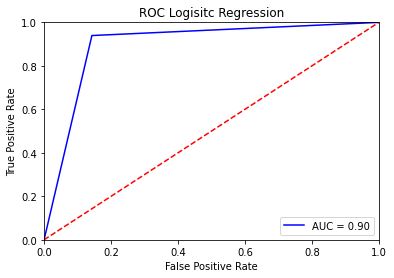

In [973]:
from sklearn.metrics import roc_curve, roc_auc_score

# calculate receiver operating characteristic(ROC) curve 

# calculate false positive rate (1 - specificity)
# calculate true positive rate (recall/sensitivity)
fpr, tpr, threshold = roc_curve(y_test, lr_predictions)

# calculate the area under the curve score (correctly classified instances)
roc_auc = roc_auc_score(y_test, lr_predictions)

# plot roc_auc score
import matplotlib.pyplot as plt
plt.title('ROC Logisitc Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### **Summary**

Logistic Regression performed about the same on the min-max scaled dataset as it did the standard scaled data set.

On the mm scaled testing set, the model had an overalll  accuracy score of 90%. It's precision was 89%, and it's recall was 94%. The f1 score was 0.91. It was about as  successful at predicting what was "not" a positive diagnosis- it's specificity is ~86%.

As demonstrated by the ROC curve graph, the AUC was 0.90. 

Logisitic regression performs best when the dimensionality of the dataset is reduced to "categories" rather than continous values. But, if the original dataset is scaled (either standard or minmax), regression performs nearly as well as it does on the reduced dimensionality dataset.





# **Random Forrest**

## **Using grouped data**

### **Running the model**

In [974]:
# use the 80-20 rule for validation.

# First, let's used the grouped data
X_train, X_test, y_train, y_test = train_test_split(groupedX, y, stratify=y, test_size=0.2,  random_state = 54)

In [975]:
# 242 training cases 
X_train.shape

(242, 13)

In [976]:
# 61 training cases 
X_test.shape

(61, 13)

In [977]:
# Let's try random forrest classifier 
from sklearn.ensemble import RandomForestClassifier 

rf_classifier = RandomForestClassifier(random_state= 54,
                                       n_estimators=100,
                                       n_jobs=5)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=5,
                       oob_score=False, random_state=54, verbose=0,
                       warm_start=False)

### **The confusion matrix and classification report**

In [978]:
# The confusion matrix

rf_predictions = rf_classifier.predict(X_test)

labels = rf_classifier.classes_

# compute TP, TN, FP, FN values
rf_cm = confusion_matrix(y_true=y_test, 
                      y_pred = rf_predictions, 
                      labels = labels)
# print confusion matrix
pd.DataFrame(rf_cm, index=labels, columns=labels)

,0,1
0,24,4
1,4,29


In [979]:
# Accuracy scores on the training and testing sets

rf_train_grouped = round(rf_classifier.score(X_train, y_train), 2) # training score
rf_test_grouped = round(rf_classifier.score(X_test, y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (rf_train_grouped, rf_test_grouped))

Training and Testing scores: 1.00, 0.87


In [980]:
# compute recall, precision, f1-scores
rf_cr = classification_report(y_true=y_test, 
                      y_pred = rf_predictions, 
                      labels = labels)

print(rf_cr)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        28
           1       0.88      0.88      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### **The ROC curve**

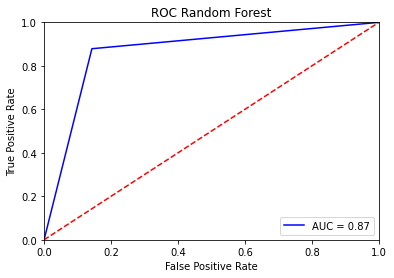

In [981]:
from sklearn.metrics import roc_curve, roc_auc_score

# calculate receiver operating characteristic(ROC) curve 

# calculate false positive rate (1 - specificity)
# calculate true positive rate (recall/sensitivity)
fpr, tpr, threshold = roc_curve(y_test, rf_predictions)

# calculate the area under the curve score (correctly classified instances)
roc_auc = roc_auc_score(y_test, rf_predictions)

# plot roc_auc score
import matplotlib.pyplot as plt
plt.title('ROC Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### **Summary**

Using the grouped data, my the randomed forest model performed well (but not as impressively as logistic regression).  

The model had an overalll testing set accuracy score of 87%. It's precision and recall were 88% and the f1 score was 0.88. It was about as successful at predicting what was "not" a positive diagnosis: it's specificity is 86%.

As demonstrated by the ROC curve graph, the AUC was 0.87, which suggests when data is grouped, the random forest model performed well on it's testing set.

Out of curiousity, does the random forest model perform better when the data is not grouped?



## **Using ungrouped data**

### **Running the model**

In [982]:
# use the 80-20 rule for validation.

# First, let's used the grouped data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,  random_state = 54)

In [983]:
# 242 training cases 
X_train.shape

(242, 13)

In [984]:
# 61 training cases 
X_test.shape

(61, 13)

In [985]:
# Let's try random forrest classifier 
from sklearn.ensemble import RandomForestClassifier 

rf_classifier = RandomForestClassifier(random_state= 54,
                                       n_estimators=100,
                                       n_jobs=5)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=5,
                       oob_score=False, random_state=54, verbose=0,
                       warm_start=False)

### **The confusion matrix and classification report**

In [986]:
# The confusion matrix

rf_predictions = rf_classifier.predict(X_test)

labels = rf_classifier.classes_

# compute TP, TN, FP, FN values
rf_cm = confusion_matrix(y_true=y_test, 
                      y_pred = rf_predictions, 
                      labels = labels)
# print confusion matrix
pd.DataFrame(rf_cm, index=labels, columns=labels)

,0,1
0,23,5
1,4,29


In [987]:
# Accuracy scores on the training and testing sets

rf_train = round(rf_classifier.score(X_train, y_train), 2) # training score
rf_test = round(rf_classifier.score(X_test, y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (rf_train, rf_test))

Training and Testing scores: 1.00, 0.85


In [988]:
# compute recall, precision, f1-scores
rf_cr = classification_report(y_true=y_test, 
                      y_pred = rf_predictions, 
                      labels = labels)

print(rf_cr)

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.85      0.88      0.87        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### **The ROC curve**

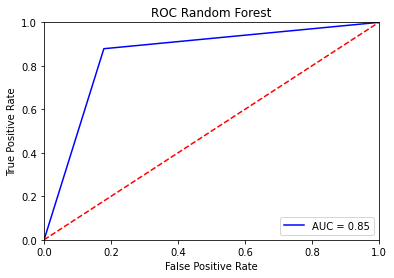

In [989]:
from sklearn.metrics import roc_curve, roc_auc_score

# calculate receiver operating characteristic(ROC) curve 

# calculate false positive rate (1 - specificity)
# calculate true positive rate (recall/sensitivity)
fpr, tpr, threshold = roc_curve(y_test, rf_predictions)

# calculate the area under the curve score (correctly classified instances)
roc_auc = roc_auc_score(y_test, rf_predictions)

# plot roc_auc score
import matplotlib.pyplot as plt
plt.title('ROC Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### **Summary**

Using the ungrouped data, the random forest model performed similarily to how it did using the grouped data.  

The model had an overalll testing set accuracy score of 85%. It's precision was 85%, and it's recall was 88%. The f1 score was 0.87. It was about as successful at predicting what was "not" a positive diagnosis: it's specificity is 82%.

As demonstrated by the ROC curve graph, the AUC was 0.85. 


## **Using standard scaler (ungrouped) data**

### **Running the model**

In [990]:
# use the 80-20 rule for validation.

# First, let's used the grouped data
X_train, X_test, y_train, y_test = train_test_split(standard_scaled, y, stratify=y, test_size=0.2,  random_state = 54)

In [991]:
# 242 training cases 
X_train.shape

(242, 13)

In [992]:
# 61 training cases 
X_test.shape

(61, 13)

In [993]:
# Let's try random forrest classifier 
from sklearn.ensemble import RandomForestClassifier 

rf_classifier = RandomForestClassifier(random_state=54,
                                       n_estimators=100,
                                       n_jobs=5)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=5,
                       oob_score=False, random_state=54, verbose=0,
                       warm_start=False)

### **The confusion matrix and classification report**

In [994]:
# The confusion matrix

rf_predictions = rf_classifier.predict(X_test)

labels = rf_classifier.classes_

# compute TP, TN, FP, FN values
rf_cm = confusion_matrix(y_true=y_test, 
                      y_pred = rf_predictions, 
                      labels = labels)
# print confusion matrix
pd.DataFrame(rf_cm, index=labels, columns=labels)

,0,1
0,23,5
1,4,29


In [995]:
# Accuracy scores on the training and testing sets

rf_train_scaled = round(rf_classifier.score(X_train, y_train), 2) # training score
rf_test_scaled = round(rf_classifier.score(X_test, y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (rf_train_scaled, rf_test_scaled))

Training and Testing scores: 1.00, 0.85


In [996]:
# compute recall, precision, f1-scores
rf_cr = classification_report(y_true=y_test, 
                      y_pred = rf_predictions, 
                      labels = labels)

print(rf_cr)

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.85      0.88      0.87        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### **The ROC curve**

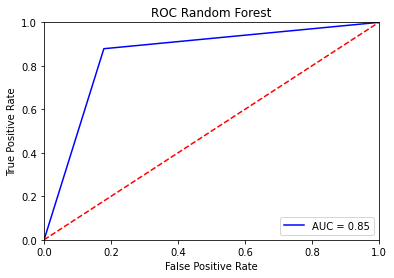

In [997]:
from sklearn.metrics import roc_curve, roc_auc_score

# calculate receiver operating characteristic(ROC) curve 

# calculate false positive rate (1 - specificity)
# calculate true positive rate (recall/sensitivity)
fpr, tpr, threshold = roc_curve(y_test, rf_predictions)

# calculate the area under the curve score (correctly classified instances)
roc_auc = roc_auc_score(y_test, rf_predictions)

# plot roc_auc score
import matplotlib.pyplot as plt
plt.title('ROC Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### **Summary**

Using the scaled ungrouped data, the random forest model performed identically to how it did using the unscaled ungrouped data. 

## **Using min max scaler (ungrouped) data**

### **Running the model**

In [998]:
# use the 80-20 rule for validation.

# First, let's used the grouped data
X_train, X_test, y_train, y_test = train_test_split(mm_scaled, y, stratify=y, test_size=0.2,  random_state = 54)

In [999]:
# 242 training cases 
X_train.shape

(242, 13)

In [1000]:
# 61 training cases 
X_test.shape

(61, 13)

In [1001]:
# Let's try random forrest classifier 
from sklearn.ensemble import RandomForestClassifier 

rf_classifier = RandomForestClassifier(random_state=54,
                                       n_estimators=100,
                                       n_jobs=5)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=5,
                       oob_score=False, random_state=54, verbose=0,
                       warm_start=False)

### **The confusion matrix and classification report**

In [1002]:
# The confusion matrix

rf_predictions = rf_classifier.predict(X_test)

labels = rf_classifier.classes_

# compute TP, TN, FP, FN values
rf_cm = confusion_matrix(y_true=y_test, 
                      y_pred = rf_predictions, 
                      labels = labels)
# print confusion matrix
pd.DataFrame(rf_cm, index=labels, columns=labels)

,0,1
0,23,5
1,4,29


In [1003]:
# Accuracy scores on the training and testing sets

rf_train_mmscaled = round(rf_classifier.score(X_train, y_train), 2) # training score
rf_test_mmscaled = round(rf_classifier.score(X_test, y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (rf_train_mmscaled, rf_test_mmscaled))

Training and Testing scores: 1.00, 0.85


In [1004]:
# compute recall, precision, f1-scores
rf_cr = classification_report(y_true=y_test, 
                      y_pred = rf_predictions, 
                      labels = labels)

print(rf_cr)

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.85      0.88      0.87        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### **The ROC curve**

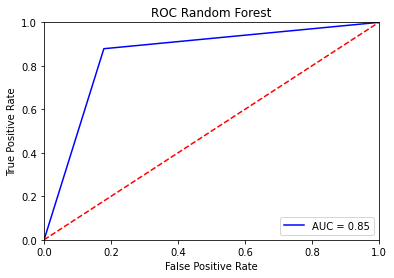

In [1005]:
from sklearn.metrics import roc_curve, roc_auc_score

# calculate receiver operating characteristic(ROC) curve 

# calculate false positive rate (1 - specificity)
# calculate true positive rate (recall/sensitivity)
fpr, tpr, threshold = roc_curve(y_test, rf_predictions)

# calculate the area under the curve score (correctly classified instances)
roc_auc = roc_auc_score(y_test, rf_predictions)

# plot roc_auc score
import matplotlib.pyplot as plt
plt.title('ROC Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### **Summary**

Using the scaled ungrouped data, the random forest model performed identically to how it did using the unscaled ungrouped data. 

# **SGD Classifier**

## **Using grouped data**

### **Running the model**

In [1006]:
# use the 80-20 rule for validation.

# First, let's used the grouped data
X_train, X_test, y_train, y_test = train_test_split(groupedX, y, stratify=y, test_size=0.2,  random_state = 54)

In [1007]:
# 242 training cases 
X_train.shape

(242, 13)

In [1008]:
# 61 training cases 
X_test.shape

(61, 13)

In [1009]:
# Let's use SGD classifier this time 

from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(max_iter=1000, 
                        tol=1e-3, 
                        random_state=32,
                        n_jobs=5, # parallelize over 5 workers
                        )

# Fit the model
sgd_classifier.fit(X_train, y_train)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=5, penalty='l2',
              power_t=0.5, random_state=32, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

### **The confusion matrix and classification report**

In [1010]:
# The confusion matrix

sgd_predictions = sgd_classifier.predict(X_test)

labels = sgd_classifier.classes_

# compute TP, TN, FP, FN values
sgd_cm = confusion_matrix(y_true=y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)
# print confusion matrix
pd.DataFrame(sgd_cm, index=labels, columns=labels)

,0,1
0,21,7
1,2,31


In [1011]:
# Accuracy scores on the training and testing sets

sgd_train_grouped = round(sgd_classifier.score(X_train, y_train), 2) # training score
sgd_test_grouped = round(sgd_classifier.score(X_test, y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (sgd_train_grouped, sgd_test_grouped))

Training and Testing scores: 0.79, 0.85


In [1012]:
# compute recall, precision, f1-scores
sgd_cr = classification_report(y_true=y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)

print(sgd_cr)

              precision    recall  f1-score   support

           0       0.91      0.75      0.82        28
           1       0.82      0.94      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.86      0.85      0.85        61



### **The ROC curve**

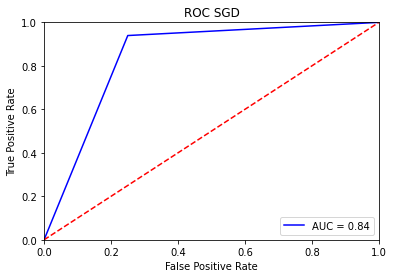

In [1013]:
from sklearn.metrics import roc_curve, roc_auc_score

# calculate receiver operating characteristic(ROC) curve 

# calculate false positive rate (1 - specificity)
# calculate true positive rate (recall/sensitivity)
fpr, tpr, threshold = roc_curve(y_test, sgd_predictions)

# calculate the area under the curve score (correctly classified instances)
roc_auc = roc_auc_score(y_test, sgd_predictions)

# plot roc_auc score
import matplotlib.pyplot as plt
plt.title('ROC SGD')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### **Summary**

Using the grouped data, my the SGD model performed about as well as the random forest model (but not as impressively as logistic regression).  

The model had an overalll testing set accuracy score of 85%. It's precision was 82%, and it's recall was 94%. The f1 score was 0.87. It was not as successful at predicting what was "not" a positive diagnosis: it's specificity is 75%.

As demonstrated by the ROC curve graph, the AUC was 0.84, which suggests when data is grouped, the SGD model performed well on it's testing set.

Out of curiousity, does the SGD perform better when the data is not grouped?



## **Using ungrouped data**

### **Running the model**

In [1014]:
# use the 80-20 rule for validation.

# First, let's used the grouped data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,  random_state = 54)

In [1015]:
# 242 training cases 
X_train.shape

(242, 13)

In [1016]:
# 61 training cases 
X_test.shape

(61, 13)

In [1017]:
# Let's use SGD classifier this time 

from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(max_iter=1000, 
                        tol=1e-3, 
                        random_state=32,
                        n_jobs=5, # parallelize over 5 workers
                        )

# Fit the model
sgd_classifier.fit(X_train, y_train)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=5, penalty='l2',
              power_t=0.5, random_state=32, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

### **The confusion matrix and classification report**

In [1018]:
# The confusion matrix

sgd_predictions = sgd_classifier.predict(X_test)

labels = sgd_classifier.classes_

# compute TP, TN, FP, FN values
sgd_cm = confusion_matrix(y_true=y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)
# print confusion matrix
pd.DataFrame(sgd_cm, index=labels, columns=labels)

,0,1
0,17,11
1,6,27


In [1019]:
# Accuracy scores on the training and testing sets

sgd_train = round(sgd_classifier.score(X_train, y_train), 2) # training score
sgd_test = round(sgd_classifier.score(X_test, y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (sgd_train, sgd_test))

Training and Testing scores: 0.68, 0.72


In [1020]:
# compute recall, precision, f1-scores
sgd_cr = classification_report(y_true=y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)

print(sgd_cr)

              precision    recall  f1-score   support

           0       0.74      0.61      0.67        28
           1       0.71      0.82      0.76        33

    accuracy                           0.72        61
   macro avg       0.72      0.71      0.71        61
weighted avg       0.72      0.72      0.72        61



### **The ROC curve**

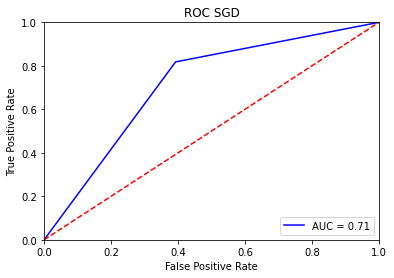

In [1021]:
from sklearn.metrics import roc_curve, roc_auc_score

# calculate receiver operating characteristic(ROC) curve 

# calculate false positive rate (1 - specificity)
# calculate true positive rate (recall/sensitivity)
fpr, tpr, threshold = roc_curve(y_test, sgd_predictions)

# calculate the area under the curve score (correctly classified instances)
roc_auc = roc_auc_score(y_test, sgd_predictions)

# plot roc_auc score
import matplotlib.pyplot as plt
plt.title('ROC SGD')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### **Summary**

My SGD performed worse on an ungrouped dataset than on a grouped dataset. 

The model had an overalll testing set accuracy score of 72% (lowest accuracy so far). It's precision was 71%, and it's recall was 82%. The f1 score was 0.76. It was poor at predicting what was "not" a positive diagnosis: it's specificity is 61%.

As demonstrated by the ROC curve graph, the AUC was 0.71, which suggests when data is grouped, the SGD model performed fair on it's testing set.

## **Using standard scaled (ungrouped) data**

### **Running the model**

In [1022]:
# use the 80-20 rule for validation.

# First, let's used the grouped data
X_train, X_test, y_train, y_test = train_test_split(standard_scaled, y, stratify=y, test_size=0.2,  random_state = 54)

In [1023]:
# 242 training cases 
X_train.shape

(242, 13)

In [1024]:
# 61 training cases 
X_test.shape

(61, 13)

In [1025]:
# Let's use SGD classifier this time 

from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(max_iter=1000, 
                        tol=1e-3, 
                        random_state=32,
                        n_jobs=5, # parallelize over 5 workers
                        )

# Fit the model
sgd_classifier.fit(X_train, y_train)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=5, penalty='l2',
              power_t=0.5, random_state=32, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

### **The confusion matrix and classification report**

In [1026]:
# The confusion matrix

sgd_predictions = sgd_classifier.predict(X_test)

labels = sgd_classifier.classes_

# compute TP, TN, FP, FN values
sgd_cm = confusion_matrix(y_true=y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)
# print confusion matrix
pd.DataFrame(sgd_cm, index=labels, columns=labels)

,0,1
0,23,5
1,6,27


In [1027]:
# Accuracy scores on the training and testing sets

sgd_train_scaled = round(sgd_classifier.score(X_train, y_train), 2) # training score
sgd_test_scaled = round(sgd_classifier.score(X_test, y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (sgd_train_scaled, sgd_test_scaled))

Training and Testing scores: 0.78, 0.82


In [1028]:
# compute recall, precision, f1-scores
sgd_cr = classification_report(y_true=y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)

print(sgd_cr)

              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



### **The ROC curve**

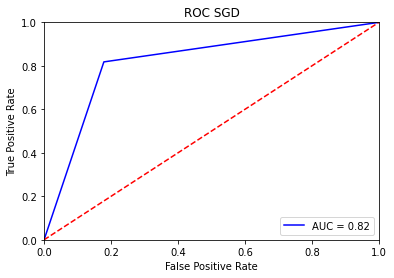

In [1029]:
from sklearn.metrics import roc_curve, roc_auc_score

# calculate receiver operating characteristic(ROC) curve 

# calculate false positive rate (1 - specificity)
# calculate true positive rate (recall/sensitivity)
fpr, tpr, threshold = roc_curve(y_test, sgd_predictions)

# calculate the area under the curve score (correctly classified instances)
roc_auc = roc_auc_score(y_test, sgd_predictions)

# plot roc_auc score
import matplotlib.pyplot as plt
plt.title('ROC SGD')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### **Summary**

My SGD performed better on an scaled, ungrouped dataset than on a unscaled, ungrouped dataset. 

The model had an overalll testing set accuracy score of 82%. It's precision was 84%, and it's recall was 82%. The f1 score was 0.83. It was less successful (but not as bad as unscaled) at predicting what was "not" a positive diagnosis: it's specificity is 79%.

As demonstrated by the ROC curve graph, the AUC was 0.82, which suggests when data is scaled, the SGD model performed better on it's testing set.

## **Using min max scaled (ungrouped) data**

### **Running the model**

In [1030]:
# use the 80-20 rule for validation.

# First, let's used the grouped data
X_train, X_test, y_train, y_test = train_test_split(mm_scaled, y, stratify=y, test_size=0.2,  random_state = 54)

In [1031]:
# 242 training cases 
X_train.shape

(242, 13)

In [1032]:
# 61 training cases 
X_test.shape

(61, 13)

In [1033]:
# Let's use SGD classifier this time 

from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(max_iter=1000, 
                        tol=1e-3, 
                        random_state=32,
                        n_jobs=5, # parallelize over 5 workers
                        )

# Fit the model
sgd_classifier.fit(X_train, y_train)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=5, penalty='l2',
              power_t=0.5, random_state=32, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

### **The confusion matrix and classification report**

In [1034]:
# The confusion matrix

sgd_predictions = sgd_classifier.predict(X_test)

labels = sgd_classifier.classes_

# compute TP, TN, FP, FN values
sgd_cm = confusion_matrix(y_true=y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)
# print confusion matrix
pd.DataFrame(sgd_cm, index=labels, columns=labels)

,0,1
0,12,16
1,0,33


In [1035]:
# Accuracy scores on the training and testing sets

sgd_train_mmscaled = round(sgd_classifier.score(X_train, y_train), 2) # training score
sgd_test_mmscaled = round(sgd_classifier.score(X_test, y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (sgd_train_mmscaled, sgd_test_mmscaled))

Training and Testing scores: 0.68, 0.74


In [1036]:
# compute recall, precision, f1-scores
sgd_cr = classification_report(y_true=y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)

print(sgd_cr)

              precision    recall  f1-score   support

           0       1.00      0.43      0.60        28
           1       0.67      1.00      0.80        33

    accuracy                           0.74        61
   macro avg       0.84      0.71      0.70        61
weighted avg       0.82      0.74      0.71        61



### **The ROC curve**

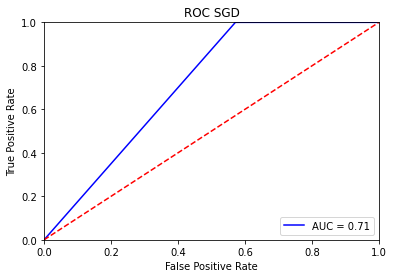

In [1037]:
from sklearn.metrics import roc_curve, roc_auc_score

# calculate receiver operating characteristic(ROC) curve 

# calculate false positive rate (1 - specificity)
# calculate true positive rate (recall/sensitivity)
fpr, tpr, threshold = roc_curve(y_test, sgd_predictions)

# calculate the area under the curve score (correctly classified instances)
roc_auc = roc_auc_score(y_test, sgd_predictions)

# plot roc_auc score
import matplotlib.pyplot as plt
plt.title('ROC SGD')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### **Summary**

The min max scaler did not improve SGD model performance overall (accuracy for ungrouped, non scaled is 72%).

Interestingly, the SGD model with the min max scaled dataset had perfect recall. But it's very poor specifity and precision scores suggest it over diagnosises patients. 


# **Plotted Accuracies**

## **Reduced Dimensionality Datasets**

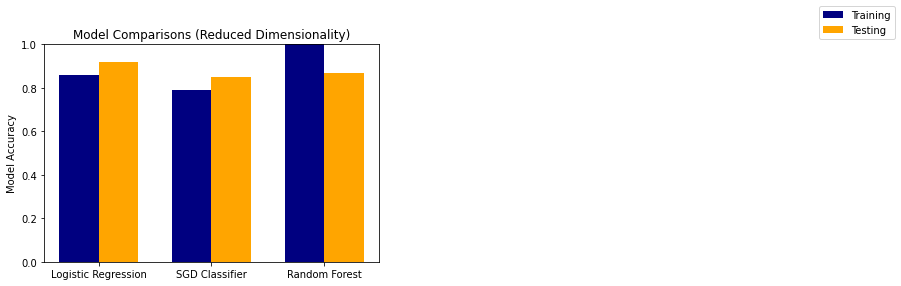

In [1038]:
# Plot for training and testing accuracies for all 3 models on grouped datasets
labels = ['Logistic Regression', 'SGD Classifier', 'Random Forest']
training_scores = [lr_train_grouped, sgd_train_grouped, rf_train_grouped]
testing_scores =  [lr_test_grouped, sgd_test_grouped, rf_test_grouped]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Model Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (2.3, 1.0), loc='lower left')

plt.title('Model Comparisons (Reduced Dimensionality)')
plt.show()

## **Full Dimensionality Datasets**

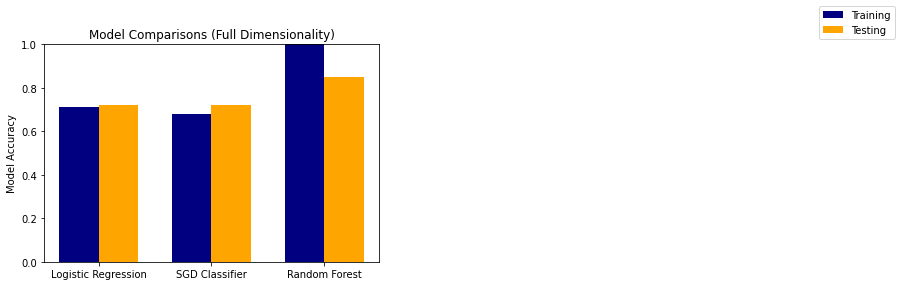

In [1039]:
# Plot for training and testing accuracies for all 3 models on ungrouped datasets
labels = ['Logistic Regression', 'SGD Classifier', 'Random Forest']
training_scores = [lr_train, sgd_train, rf_train]
testing_scores =  [lr_test, sgd_test, rf_test]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Model Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (2.3, 1.0), loc='lower left')

plt.title('Model Comparisons (Full Dimensionality)')
plt.show()

## **Standard Scaled, Full Dimensionality Datasets**

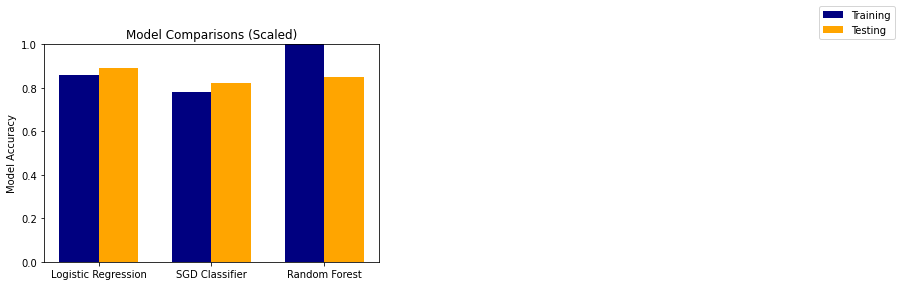

In [1043]:
# Plot for training and testing accuracies for all 3 models on scaled, ungrouped datasets
labels = ['Logistic Regression', 'SGD Classifier', 'Random Forest']
training_scores = [lr_train_scaled, sgd_train_scaled, rf_train_scaled]
testing_scores =  [lr_test_scaled, sgd_test_scaled, rf_test_scaled]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Model Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (2.3, 1.0), loc='lower left')

plt.title('Model Comparisons (Scaled)')
plt.show()

## **Min-max Scaled, Full Dimensionality Datasets**

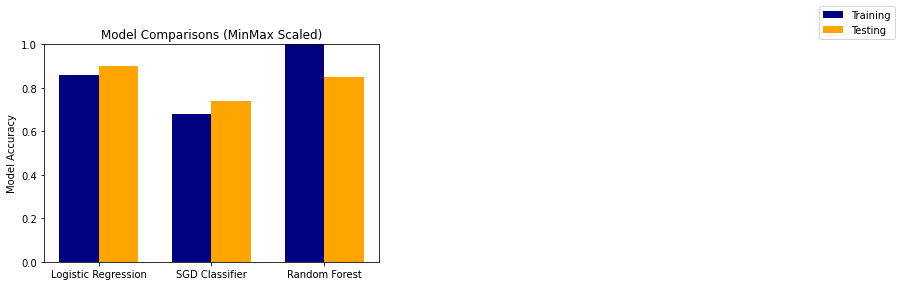

In [1042]:
# Plot for training and testing accuracies for all 3 models on min max scaled, ungrouped datasets
labels = ['Logistic Regression', 'SGD Classifier', 'Random Forest']
training_scores = [lr_train_mmscaled, sgd_train_mmscaled, rf_train_mmscaled]
testing_scores =  [lr_test_mmscaled, sgd_test_mmscaled, rf_test_mmscaled]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Model Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (2.3, 1.0), loc='lower left')

plt.title('Model Comparisons (MinMax Scaled)')
plt.show()

# **Summary**

The "best performing" model depends on how the datasets were prepared. 

**Full Dimensionality, No Scaling:**

With no data preparation, the clear winner was the random forest model with a testing accuracy rate of 85% (recall: 88%, specifity: 82%).

In comparsion, logistic regression and sgd both had a testing accuracy rate of 72%. Both had very poor specifity (68% and 61% respectively). SGD did have a slightly better recall: 82% vs 76%.

**Full Dimensionality, Standard Scaling:**

When the data was scaled (standard scaler), the logistic regression model received a significant performance boost. It's testing accuracy rate jumped to 89% (with a recall rate of 91% and specifity at 89%).  

Standard scaling also increased the SGD model's performance (though less impressively) to 82% for accuracy, specifity and recall. 

**Full Dimensionality, MinMax Scaling:**

Min-max scaling provided a similar performance boost to the logistic regression model (testing accuracy to 90%, recall to 94%, specifity to 89%). 

On the other hand, min-max scaling the dataset seemed to actually slightly decrease the performance of the SGD model (testing accuracy to 71%). Based on the model's perfect recall and low specifity and precision, it appears min-max scaling the data confused the SGD model into over-classifying patients as heart disease positive.  

**Full Dimensionality, Any Scaling:**

Interestingly, neither standard scaling nor min max scaling had any impact on the performance of the random forest model. 


**Reduced Dimensionality:**

When the models were run on the reduced dimensionality datasets (intially created to aid visualization), the performance of the logistic regression model and SGD model improved. 

The logistic regression model recieved greatest boost in peformance from the reduced dimensionality (the logistic regression model also received a greater boost from reduced dimensionality than it did from any kind of scaling). With the reduced dataset, the logistic regression model had a 92% testing accuracy rate, with 94% recall, 91% precision, and 89% specifity. 

Simply reducing the dimensionality also provided the SGD model with a significant performance boost. It's overall testing accuracy rate jumped to 85%, with a 94% recall rate. It's precision and specifity however, were not as improved as the logistic regression model's (82% and 75% respectively). 

The random forest model performed about the same regardless of dimensionality (85% vs 87% testing accuracy).


**Conclusion**

In terms of model alone, random forest outperformed. However, its performance was consistent across all datasets (all data preparation). When the dataset was scaled or dimensionality was reduced, the logistic regression model outperformed random forest by 4% to 7%. 

The SGD Classifier model performed comparably to random forest when dimensionality was reduced (85% each). When the dataset was standardized, it performed nearly as well as random forest (82%). Its performance on full dimensionality datasets or min-max scaled datasets, however, was clearly worse than random forest. 

